# Analizing, Visualizing Forecasting results.

Ucadity Course: https://classroom.udacity.com/courses/ud980/lessons/a6aea681-ab76-488f-89e5-8e489f9c178a/concepts/93969e7d-f2cd-4ec4-8380-925eaaebf6cf


## 1. Understanding the Problem Statement and Dataset
Our data is in a file calld champagne-sales in 'input' directory. We have to:

Your forecasting model should include features which capture all the important properties of the time series, patterns of variation in level of trend, effects of seasonality and removing autocorrelation.

Moreover, the assumptions on which you base your chosen model should agree with your intuition about how the time series is likely to behave in the future when fitting a forecasting model.

When fitting a forecasting model, we can used a series of identifiers that help us choose the best model.

We'll compare criteria like residual plots, forecasting errors, the Akaike information criteria from our ETS and ARIMA models that we've constructed from earlier lessons as our basis.

We're going to divide the problem in three sections:
1. We will forecast the champagne sales with a ETS model and show the results.
2. We'll do  the same with an ARIMA model.
3. We'll compare both.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from math import sqrt
from sklearn.metrics import mean_squared_error

#Importing data
df = pd.read_csv('input/champagne-sales.csv')

#Formating month column to date format. Let's guess is 21-century years
def convert_to_year(date_in_some_format):
    month_as_string = str(date_in_some_format[-2:])# last four characters
    year_as_string = "200" + date_in_some_format[0]  
    date = month_as_string + "-" + year_as_string
    return date

df['Month'] = df['Month'].apply(convert_to_year)

#Rename column 'Champagne Sales'
df.rename(columns={'Champagne Sales':'Champagne_Sales'}, inplace=True)
#Printing head
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
Month              96 non-null object
Champagne_Sales    96 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [2]:
#Aggregating the dataset at daily level
df.Timestamp = pd.to_datetime(df.Month,format='%m-%Y') 
df.index = df.Timestamp 
#df = df.resample('M').mean()


/home/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


## First step: ETS model

We'll use Holt-Winters Method.

In [15]:
#Creating train and test set 
#Index 120 marks. 96 for train and the rest for test
train=df[0:90] 
test=df[-6:]
train.Timestamp = pd.to_datetime(train.Month,format='%m-%Y') 
train.index = train.Timestamp 
train = train.resample('M').mean() 
test.Timestamp = pd.to_datetime(test.Month,format='%m-%Y') 
test.index = test.Timestamp 
test = test.resample('M').mean()


            Champagne_Sales
Month                      
2001-01-31             2851
2001-02-28             2672
2001-03-31             2755
2001-04-30             2721
2001-05-31             2946
2001-06-30             3036
2001-07-31             2282
2001-08-31             2212
2001-09-30             2922
2001-10-31             4301
2001-11-30             5764
2001-12-31             7132
2002-01-31             2541
2002-02-28             2475
2002-03-31             3031
2002-04-30             3266
2002-05-31             3776
2002-06-30             3230
2002-07-31             3028
2002-08-31             1759
2002-09-30             3595
2002-10-31             4474
2002-11-30             6838
2002-12-31             8357
2003-01-31             3113
2003-02-28             3006
2003-03-31             4047
2003-04-30             3523
2003-05-31             3937
2003-06-30             3986
...                     ...
2006-01-31             4016
2006-02-28             3957
2006-03-31          

/home/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/home/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


### Holt-Winters method

/home/emi/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


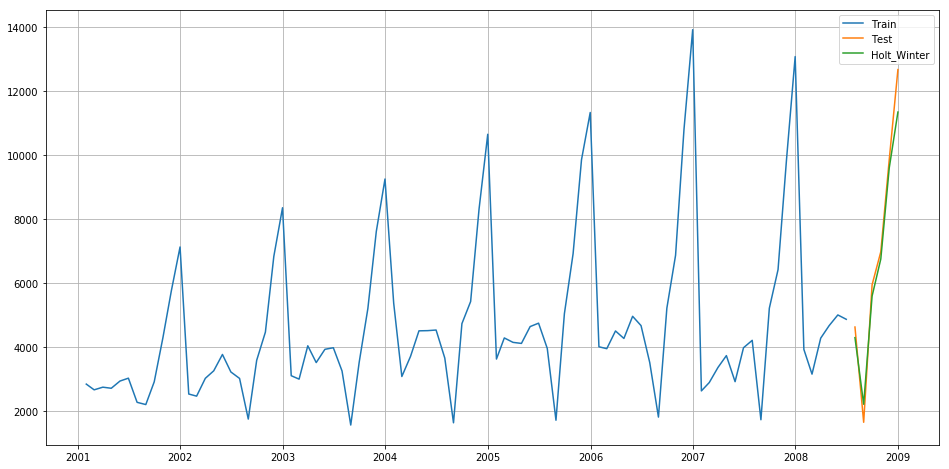

In [16]:
from statsmodels.tsa.api import ExponentialSmoothing

y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Champagne_Sales']),
                            seasonal_periods=12,
                            trend='add', 
                            seasonal='add',).fit(smoothing_level = 0.7, optimized=True)
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train.index, train['Champagne_Sales'], label='Train')
plt.plot(test.index,test['Champagne_Sales'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.grid('on')
plt.show()

### Residual plot


## 2. TIME SERIES DECOMPOSITION PLOT
Determine how the trend seasonal and error components should be applied

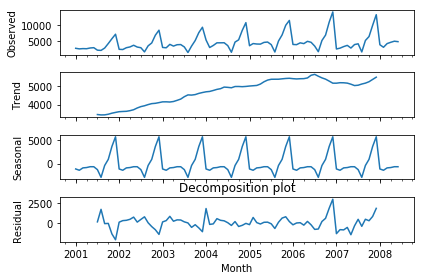

In [47]:
import statsmodels.api as sm

sm.tsa.seasonal_decompose(train['Champagne_Sales']).plot()

result = sm.tsa.stattools.adfuller(train['Champagne_Sales'])
plt.title('Decomposition plot')
plt.show()

### Solution
1. As the Error is increasing we'll use **multiplicative method**
2. As Trend doesn't increase or decrease exponentially we'll use **none**
3. As Seasonal has constant seasonal components we'll use **none**

So, ETS(M,N,N)

## 3. DETERMINE THE ARIMA TERMS

Mean and variance are constant over time vs Non-Stationary - mean and variance change over time.



### 3a. Stationarity

If a time series has a trend or seasonality component, it must be made stationary before we can use ARIMA to forecast.

The observations in a stationary time series are not dependent on time.

Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

There are two ways you can check the stationarity of a time series. 
* The first is by looking at the data. By visualizing the data it should be easy to identify a changing mean or variation in the data. 

* For a more accurate assessment there is the Dickey-Fuller test. I won’t go into the specifics of this test, but **if the ‘Test Statistic’ is greater than the ‘Critical Value’** than the time series is stationary.

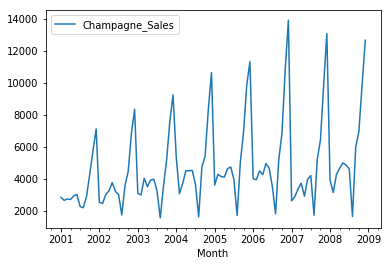

In [48]:
#Checking stationaritiy first way
df.plot()
plt.show()

The dataset is non-stationary as we can see both trend and seasonal components.

In [49]:
#Checking stationarity second way
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/home/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/home/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys


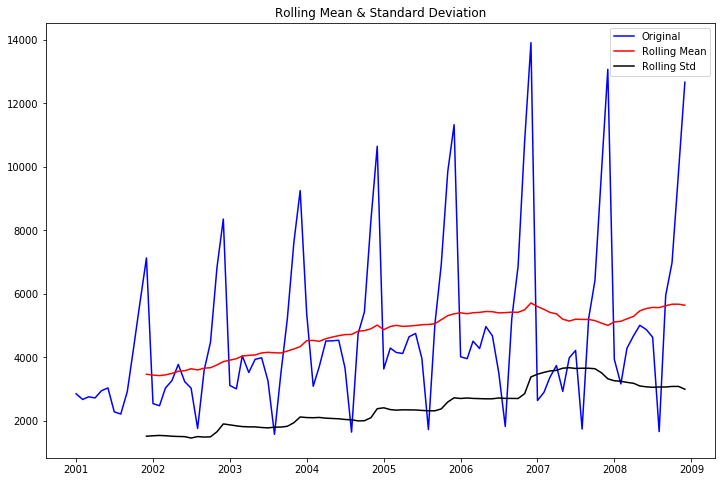

Results of Dickey-Fuller Test:
Test Statistic                 -1.639192
p-value                         0.462683
#Lags Used                     11.000000
Number of Observations Used    84.000000
Critical Value (1%)            -3.510712
Critical Value (5%)            -2.896616
Critical Value (10%)           -2.585482
dtype: float64


In [50]:
test_stationarity(df.Champagne_Sales)

As we can see:
Test Statistic is greater than Critical Value, so the **time series is stationary**

### 3b. Differencing

Take the value in the current period and subtract it by the value from the previous period. You might have to do this several times to make the data stationary. This is the Integrated component which is d in the model terms.
 

If the time series is not stationary, it needs to be stationarized through differencing. 
a. Take the first difference, then check for stationarity. 
b. Take as many differences as it takes. 
c. Make sure you check seasonal differencing as well.

From now on we'll use test_stationarity function to measure stationaryty.

#### First difference

The first thing we want to do is take a first difference of the data. This should help to eliminate the overall trend from the data.

/home/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/home/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys


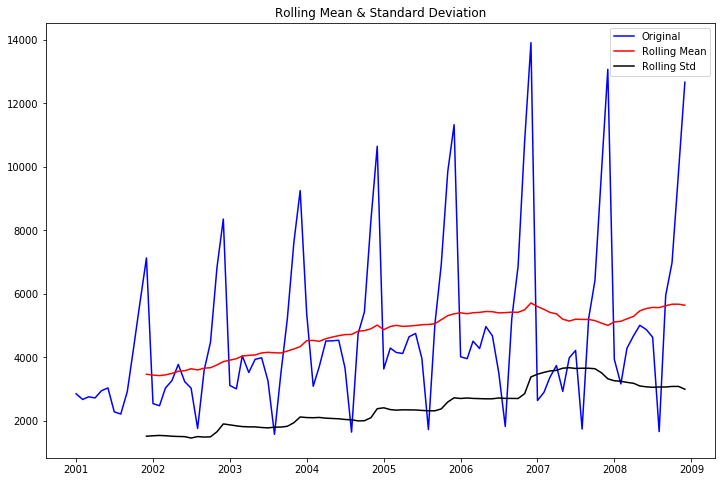

Results of Dickey-Fuller Test:
Test Statistic                 -1.639192
p-value                         0.462683
#Lags Used                     11.000000
Number of Observations Used    84.000000
Critical Value (1%)            -3.510712
Critical Value (5%)            -2.896616
Critical Value (10%)           -2.585482
dtype: float64


In [51]:
df['first_difference'] = df.Champagne_Sales - df.Champagne_Sales.shift(1)  
test_stationarity(df.Champagne_Sales.dropna(inplace=False))


#### Take as many differences as it takes
In this case 11.

/home/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/home/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys


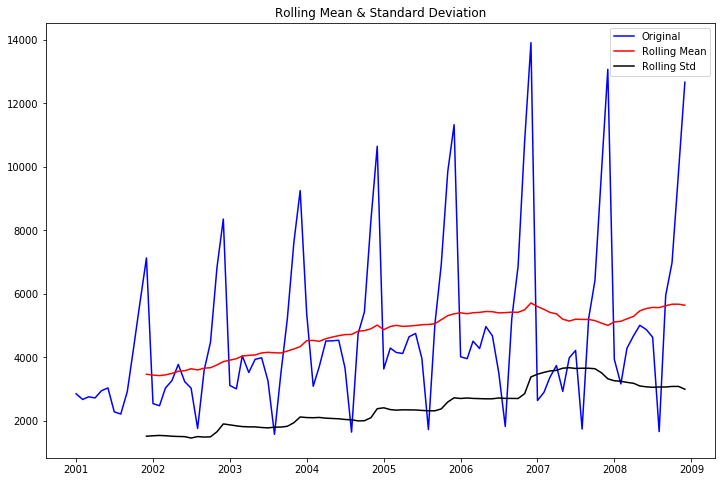

Results of Dickey-Fuller Test:
Test Statistic                 -1.639192
p-value                         0.462683
#Lags Used                     11.000000
Number of Observations Used    84.000000
Critical Value (1%)            -3.510712
Critical Value (5%)            -2.896616
Critical Value (10%)           -2.585482
dtype: float64


In [52]:
df['many_differences_as_takes'] = df.Champagne_Sales - df.Champagne_Sales.shift(11)  
test_stationarity(df.Champagne_Sales.dropna(inplace=False))

#### Take a seasonal difference
To remove the seasonality of the data and see how that impacts the stationarity of the data.


/home/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/home/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys


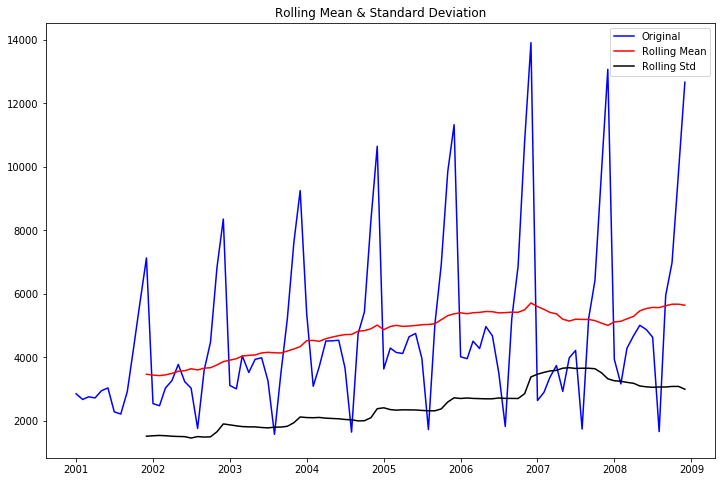

Results of Dickey-Fuller Test:
Test Statistic                 -1.639192
p-value                         0.462683
#Lags Used                     11.000000
Number of Observations Used    84.000000
Critical Value (1%)            -3.510712
Critical Value (5%)            -2.896616
Critical Value (10%)           -2.585482
dtype: float64


In [53]:
df['seasonal_difference'] = df.Champagne_Sales - df.Champagne_Sales.shift(12)  
test_stationarity(df.Champagne_Sales.dropna(inplace=False))

### 3c. Autocorrelation (ACF)

How correlated a time series is with its past values, if positive at Lag-1 then AR if negative then MA.


/home/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
/home/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


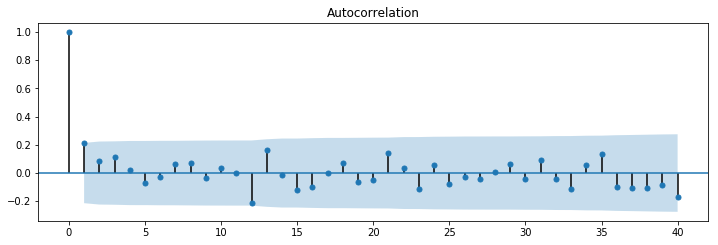

In [170]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.seasonal_difference.iloc[12:], lags=40, ax=ax1)


### 3d. Partial Autocorrelation Function (PACF)

The correlation between 2 variables controlling for the values of another set of variables. If the partial autocorrelation drops of quickly then AR terms, if it slowly decays then MA


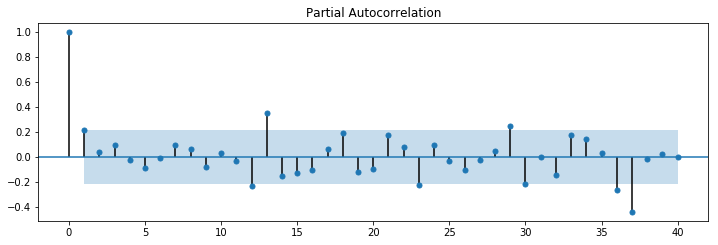

In [171]:
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_difference.iloc[12:], lags=40, ax=ax2)

We see the ACF drops off after Lag-1, which confirms that our series suggest an **AR model**.

## 4. BUILD AND VALIDATE THE ARIMA MODEL


Build the model and set the number of periods to forecast to 6.


### 4a. Build the model

The parameters for the model ((1,0,0)x(1,1,0,12)

/home/emi/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                    Champagne_Sales   No. Observations:                   90
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -635.046
Date:                            Sat, 21 Jul 2018   AIC                           1276.092
Time:                                    21:13:55   BIC                           1283.162
Sample:                                01-01-2001   HQIC                          1278.923
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3050      0.076      4.016      0.000       0.156       0.454
ar.S.L12      -0.1037      0.096   

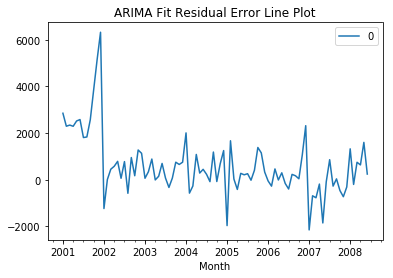

/home/emi/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


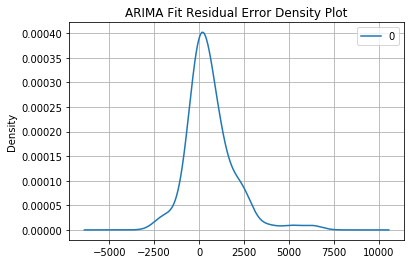

                 0
count    90.000000
mean    622.556536
std    1301.783802
min   -2147.281486
25%     -67.691369
50%     294.302724
75%    1122.807339
max    6321.487680


In [168]:
from pandas import DataFrame
mod = sm.tsa.statespace.SARIMAX(train.Champagne_Sales, trend='n', order=(1,0,0), seasonal_order=(1,1,0,12))
results = mod.fit()
print(results.summary())

# plot residual errors
residuals = DataFrame(results.resid)
residuals.plot()
plt.title("ARIMA Fit Residual Error Line Plot")
plt.show()
residuals.plot(kind='kde')
plt.title("ARIMA Fit Residual Error Density Plot")
plt.grid("on")
plt.show()
print(residuals.describe())

We can see in the charts that:

We get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.
We get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.
The distribution of the residual errors is displayed. The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).
Note, that although above we used the time series analysis, ideally is the best way when developing a predictive model.

### 4b. Validate model

Compare the predicted values to the actuals in the validation sample.

/home/emi/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/kalman_filter.py:1740: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


            Champagne_Sales      forecast
Month                                    
2001-01-01             2851           NaN
2001-02-01             2672           NaN
2001-03-01             2755           NaN
2001-04-01             2721           NaN
2001-05-01             2946           NaN
2001-06-01             3036           NaN
2001-07-01             2282           NaN
2001-08-01             2212           NaN
2001-09-01             2922           NaN
2001-10-01             4301           NaN
2001-11-01             5764           NaN
2001-12-01             7132           NaN
2002-01-01             2541           NaN
2002-02-01             2475           NaN
2002-03-01             3031           NaN
2002-04-01             3266           NaN
2002-05-01             3776           NaN
2002-06-01             3230           NaN
2002-07-01             3028           NaN
2002-08-01             1759           NaN
2002-09-01             3595           NaN
2002-10-01             4474       

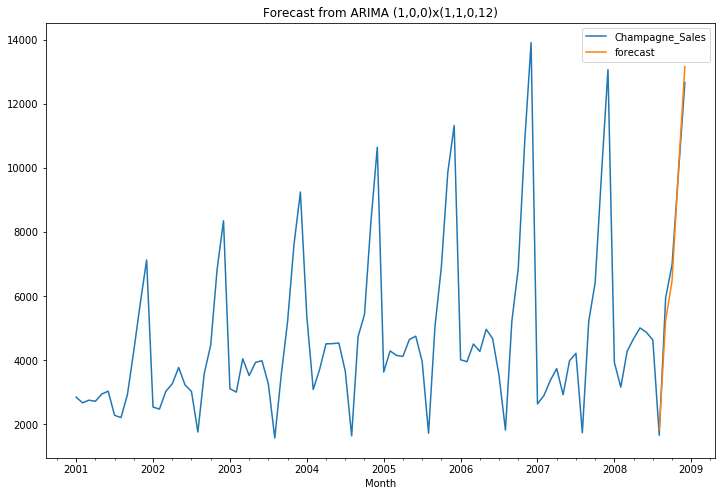

In [172]:
df['forecast'] = results.predict(start = 91, end= 96, dynamic= True)  
df[['Champagne_Sales', 'forecast']].plot(figsize=(12, 8))
plt.title('Forecast from ARIMA (1,0,0)x(1,1,0,12)')

## 5. FORECAST

Use the best ARIMA model to forecast for the desired time period. Make sure to add the holdout sample back into the model. Plot the results along with 80% and 95% confidence intervals.

QUIZ RESULT 

In [164]:
print('Final period forecast:', df.forecast[-1])
e = (df.forecast[-1] / 13366) * 100
print('Accuracy:', e)

Final period forecast: 13161.340049575902
Accuracy: 98.46880180739115


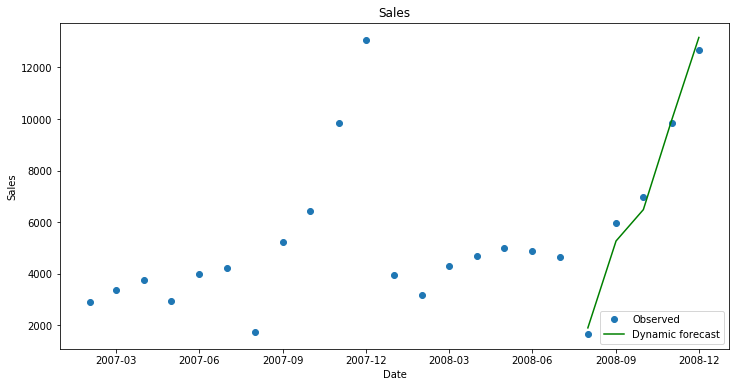

In [144]:
npredict =df.Champagne_Sales['2008'].shape[0]
fig, ax = plt.subplots(figsize=(12,6))
npre = 12
ax.set(title='Sales', xlabel='Date', ylabel='Sales')
ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'Champagne_Sales'], 'o', label='Observed')
ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'forecast'], 'g', label='Dynamic forecast')
legend = ax.legend(loc='lower right')
legend.get_frame().set_facecolor('w')

## 6. Measures (addiTional)


### Forecast Error (or Residual Forecast Error)

The forecast error is calculated as the expected value minus the predicted value.

This is called the residual error of the prediction.


forecast_error = expected_value - predicted_value

The forecast error can be calculated for each prediction, providing a time series of forecast errors.

The example below demonstrates how the forecast error can be calculated for a series of 5 predictions compared to 5 expected values.

In [153]:
expected = df.ix[-npredict-npre+19:, 'Champagne_Sales']
predictions = df.ix[-npredict-npre+19:, 'forecast']
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
print('Forecast Errors: %s' % forecast_errors)

Forecast Errors: [-236.39056112234107, 684.1086754263006, 498.0285438928013, -91.43492999756018, -491.3400495759015]


### Mean Forecast Error (MPE)
Mean forecast error is calculated as the average of the forecast error values.


mean_forecast_error = mean(forecast_error)

Forecast errors can be positive and negative. This means that when the average of these values is calculated, an ideal mean forecast error would be zero.

A mean forecast error value other than zero suggests a tendency of the model to over forecast (positive error) or under forecast (negative error). As such, the mean forecast error is also called the forecast bias.

The forecast error can be calculated directly as the mean of the forecast values. The example below demonstrates how the mean of the forecast errors can be calculated manually.

In [154]:
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
bias = sum(forecast_errors) * 1.0/len(expected)
print('MPE: %f' % bias)


Bias: 72.594336


### Mean Absolute Error (MAE)
The mean absolute error, or MAE, is calculated as the average of the forecast error values, where all of the forecast values are forced to be positive.

Forcing values to be positive is called making them absolute. This is signified by the absolute function abs() or shown mathematically as two pipe characters around the value: |value|.


mean_absolute_error = mean( abs(forecast_error) )

Where abs() makes values positive, forecast_error is one or a sequence of forecast errors, and mean() calculates the average value.

We can use the mean_absolute_error() function from the scikit-learn library to calculate the mean absolute error for a list of predictions.

In [158]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)

MAE: 400.260552


### Mean Squared Error (MSE)
The mean squared error, or MSE, is calculated as the average of the squared forecast error values. Squaring the forecast error values forces them to be positive; it also has the effect of putting more weight on large errors.

Very large or outlier forecast errors are squared, which in turn has the effect of dragging the mean of the squared forecast errors out resulting in a larger mean squared error score. In effect, the score gives worse performance to those models that make large wrong forecasts.


mean_squared_error = mean(forecast_error^2)

We can use the mean_squared_error() function from scikit-learn to calculate the mean squared error for a list of predictions.

In [159]:
mse = mean_squared_error(expected, predictions)
print('MSE: %f' % mse)

MSE: 204338.599691


### Root Mean Squared Error (RMSE)
The mean squared error described above is in the squared units of the predictions.

It can be transformed back into the original units of the predictions by taking the square root of the mean squared error score. This is called the root mean squared error, or RMSE.


rmse = sqrt(mean_squared_error)

This can be calculated by using the sqrt() math function on the mean squared error calculated using the mean_squared_error() scikit-learn function.

In [160]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# evaluate forecasts
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)


RMSE: 452.038272
